<a href="https://colab.research.google.com/github/LeTrungDunggg/LeTrungDunggg/blob/main/Bai4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [30]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/AI/Data/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 123 images belonging to 3 classes.


In [31]:
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/AI/Data/validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 37 images belonging to 3 classes.


In [32]:
training_set.class_indices

{'dat': 0, 'dung': 1, 'duy': 2}

In [33]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [34]:
opt=SGD(lr=0.01,momentum=0.9)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [35]:
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])


In [36]:
history=model.fit(training_set,epochs=100,batch_size=64,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=20)]) # verbose=1 để hiển thị quá trinh học

Epoch 1/100
4/4 [==============================] - 2s 435ms/step - loss: 4.9080 - accuracy: 0.3089 - val_loss: 1.0016 - val_accuracy: 0.3514
Epoch 2/100
4/4 [==============================] - 1s 313ms/step - loss: 0.9631 - accuracy: 0.5122 - val_loss: 0.6754 - val_accuracy: 0.4324
Epoch 3/100
4/4 [==============================] - 2s 455ms/step - loss: 0.9718 - accuracy: 0.6098 - val_loss: 0.9142 - val_accuracy: 0.8378
Epoch 4/100
4/4 [==============================] - 2s 462ms/step - loss: 0.8206 - accuracy: 0.7561 - val_loss: 0.7587 - val_accuracy: 0.5135
Epoch 5/100
4/4 [==============================] - 1s 321ms/step - loss: 0.6859 - accuracy: 0.7317 - val_loss: 0.4896 - val_accuracy: 0.6486
Epoch 6/100
4/4 [==============================] - 1s 313ms/step - loss: 0.2975 - accuracy: 0.8537 - val_loss: 0.0737 - val_accuracy: 0.9730
Epoch 7/100
4/4 [==============================] - 1s 305ms/step - loss: 0.1304 - accuracy: 0.9512 - val_loss: 0.5873 - val_accuracy: 0.7568
Epoch 8/100
4

In [37]:
# Đánh giá độ chính xác của mô hình sau khi đã train 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.0020192416850477457
Train Accuracy 1.0


<function matplotlib.pyplot.show>

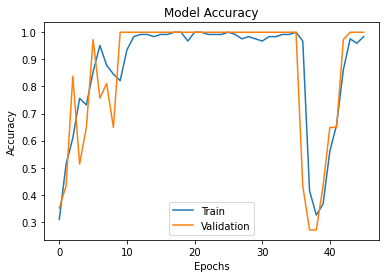

In [38]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [40]:
# Lưu lại
model.save("Final.h5")

In [41]:
model_CNN=load_model('Final.h5')

dung


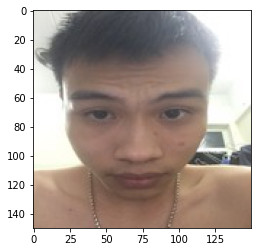

In [42]:
img=load_img('/content/drive/MyDrive/AI/Data/test/dung1.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='dat'
elif round(result[0][1])==1:
  prediction='dung'
elif round(result[0][2])==1:
  prediction='duy'
print(prediction)

duy


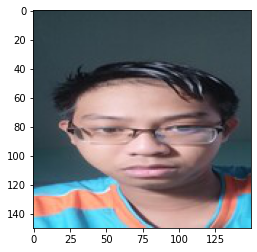

In [43]:
img=load_img('/content/drive/MyDrive/AI/Data/test/duy.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='dat'
elif round(result[0][1])==1:
  prediction='dung'
elif round(result[0][2])==1:
  prediction='duy'
print(prediction)

dung


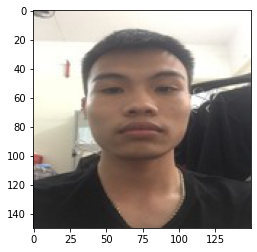

In [44]:
img=load_img('/content/drive/MyDrive/AI/Data/test/d1.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='dat'
elif round(result[0][1])==1:
  prediction='dung'
elif round(result[0][2])==1:
  prediction='duy'
print(prediction)

dat


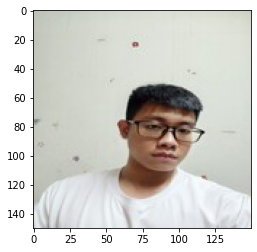

In [45]:
img=load_img('/content/drive/MyDrive/AI/Data/test/dat1.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='dat'
elif round(result[0][1])==1:
  prediction='dung'
elif round(result[0][2])==1:
  prediction='duy'
print(prediction)

dung


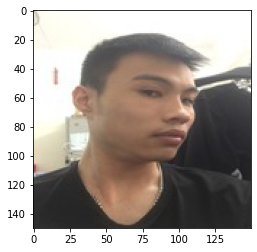

In [46]:
img=load_img('/content/drive/MyDrive/AI/Data/test/d3.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='dat'
elif round(result[0][1])==1:
  prediction='dung'
elif round(result[0][2])==1:
  prediction='duy'
print(prediction)

duy


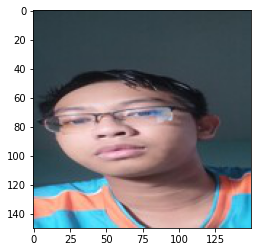

In [47]:
img=load_img('/content/drive/MyDrive/AI/Data/test/duy1.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='dat'
elif round(result[0][1])==1:
  prediction='dung'
elif round(result[0][2])==1:
  prediction='duy'
print(prediction)